# WeatherPy

## Analysis

1. From the analysis below, the cities close to the equator experiences high temperature and is cooler on the            north compared to south.
2. Cities close to equator has high humidity as the the vapor pressure is high close to the equator. Also, as in graph    few cities around 30 degree latitude has lower humidity.
3. From the graph below, most of the cities have a wind speed below 10 mph and some of few of them have a wind speed      above 20 mph.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_num = len(cities)


## Perform API Calls

In [3]:
def slice_into(arr, n):
    return [arr[i: i+n] for i in range(0,city_num, n)]

city_group = slice_into(cities, 50)


In [4]:

i = 0 # set counter for number of cities within a group
n = 50 # set counbter for number of groups 

city_group = slice_into(cities, n) # split the enitre list into different groups

base_url = "http://api.openweathermap.org/data/2.5/weather" 
gkey = "f313f7d315c8b4cddf03039c61709042"
units = 'Imperial'

# Initialize lists
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

counter = 1
print('Beginning Data Retrieval')
print("---------------------------")
for cities in city_group:
    for city in cities:
        parameters = {"q": city , "appid": gkey, "units":units}
        print("Processing Record " + str(i) + " of Set" +  str(counter) + "|" + city)
        response = requests.get(base_url,params = parameters)
        city_data = response.json()
        try:
            City.append(city_data['name'])
        except:
            print("City not found. Skipping...")
        try:
            Cloudiness.append(city_data['clouds']['all'])
        except:
            pass
        try:
            Country.append(city_data['sys']['country'])
        except:
            pass
        try:
            Date.append(city_data['dt'])
        except:
            pass
        try:
            Humidity.append(city_data['main']['humidity'])
        except:
            pass
        try:
            Lat.append(city_data['coord']['lat'])
        except:
            pass
        try:
            Lng.append(city_data['coord']['lon'])
        except:
            pass
        try:
            Max_Temp.append(city_data['main']['temp_max'])
        except:
            pass
        try:
            Wind_Speed.append(city_data['wind']['speed'])
        except:
            pass
        i += 1
    counter += 1
    
print('-------------------------')
print('Data Retrieval Complete ')
print('-------------------------')

print(len(City)) 
print(len(Cloudiness)) 
print(len(Country)) 
print(len(Date))
print(len(Humidity)) 
print(len(Lat)) 
print(len(Lng)) 
print(len(Max_Temp)) 
print(len(Wind_Speed)) 
   

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set1|clyde river
Processing Record 1 of Set1|albany
Processing Record 2 of Set1|bluff
Processing Record 3 of Set1|punta arenas
Processing Record 4 of Set1|gwadar
Processing Record 5 of Set1|makakilo city
Processing Record 6 of Set1|bathsheba
Processing Record 7 of Set1|thompson
Processing Record 8 of Set1|new norfolk
Processing Record 9 of Set1|kavieng
Processing Record 10 of Set1|sao joao da barra
Processing Record 11 of Set1|nador
Processing Record 12 of Set1|kapaa
Processing Record 13 of Set1|mataura
Processing Record 14 of Set1|kodiak
Processing Record 15 of Set1|puerto ayora
Processing Record 16 of Set1|bereda
Processing Record 17 of Set1|belushya guba
City not found. Skipping...
Processing Record 18 of Set1|satitoa
City not found. Skipping...
Processing Record 19 of Set1|desbiens
Processing Record 20 of Set1|busselton
Processing Record 21 of Set1|jamestown
Processing Record 22 of Set1|lazaro cardenas
Proc

Processing Record 194 of Set4|kyzyl-suu
Processing Record 195 of Set4|manati
Processing Record 196 of Set4|changli
Processing Record 197 of Set4|fortuna
Processing Record 198 of Set4|ribeirao do pinhal
City not found. Skipping...
Processing Record 199 of Set4|torbay
Processing Record 200 of Set5|dickinson
Processing Record 201 of Set5|san carlos
Processing Record 202 of Set5|biltine
Processing Record 203 of Set5|paldiski
Processing Record 204 of Set5|college
Processing Record 205 of Set5|brae
Processing Record 206 of Set5|tasiilaq
Processing Record 207 of Set5|klaksvik
Processing Record 208 of Set5|quatre cocos
Processing Record 209 of Set5|predejane
Processing Record 210 of Set5|aklavik
Processing Record 211 of Set5|diego de almagro
Processing Record 212 of Set5|hofn
Processing Record 213 of Set5|toliary
City not found. Skipping...
Processing Record 214 of Set5|vitim
Processing Record 215 of Set5|umm lajj
Processing Record 216 of Set5|sentyabrskiy
City not found. Skipping...
Processin

Processing Record 392 of Set8|dawson creek
Processing Record 393 of Set8|waipawa
Processing Record 394 of Set8|mys shmidta
City not found. Skipping...
Processing Record 395 of Set8|shenzhen
Processing Record 396 of Set8|kalvarija
Processing Record 397 of Set8|liberal
Processing Record 398 of Set8|porterville
Processing Record 399 of Set8|mount gambier
Processing Record 400 of Set9|tubmanburg
Processing Record 401 of Set9|xining
Processing Record 402 of Set9|praia da vitoria
Processing Record 403 of Set9|jakar
Processing Record 404 of Set9|fort nelson
Processing Record 405 of Set9|bar harbor
Processing Record 406 of Set9|cukai
Processing Record 407 of Set9|port blair
Processing Record 408 of Set9|leningradskiy
Processing Record 409 of Set9|atambua
Processing Record 410 of Set9|dvinskoy
Processing Record 411 of Set9|oga
Processing Record 412 of Set9|jinan
Processing Record 413 of Set9|vila
Processing Record 414 of Set9|zhitikara
City not found. Skipping...
Processing Record 415 of Set9|b

City not found. Skipping...
Processing Record 581 of Set12|keetmanshoop
Processing Record 582 of Set12|ahipara
Processing Record 583 of Set12|aneho
Processing Record 584 of Set12|yar-sale
Processing Record 585 of Set12|margate
Processing Record 586 of Set12|nur
Processing Record 587 of Set12|supaul
Processing Record 588 of Set12|sampit
Processing Record 589 of Set12|stornoway
City not found. Skipping...
Processing Record 590 of Set12|neiafu
Processing Record 591 of Set12|aqtobe
Processing Record 592 of Set12|rio tinto
Processing Record 593 of Set12|taybad
Processing Record 594 of Set12|hovd
Processing Record 595 of Set12|saint-louis
Processing Record 596 of Set12|maumere
Processing Record 597 of Set12|yerbogachen
Processing Record 598 of Set12|sao felix do xingu
Processing Record 599 of Set12|wuan
Processing Record 600 of Set13|xiaoweizhai
Processing Record 601 of Set13|tsabong
Processing Record 602 of Set13|boali
Processing Record 603 of Set13|vostok
Processing Record 604 of Set13|cas

In [5]:
weather_data = pd.DataFrame({"City":City, "Cloudiness":Cloudiness, "Country":Country, "Date":Date, "Humidity":Humidity, "Latitude": Lat, 
                      "Longitude":Lng, "Max_Temp": Max_Temp, "Wind_Speed":Wind_Speed})
weather_data.to_csv('output_data/cities.csv')


In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max_Temp,Wind_Speed
0,Clyde River,56,CA,1554598800,92,70.47,-68.59,6.8,21.92
1,Albany,20,US,1554601225,61,42.65,-73.75,48.2,4.38
2,Bluff,0,AU,1554601522,43,-23.58,149.07,84.9,10.54
3,Punta Arenas,75,CL,1554600148,81,-53.16,-70.91,44.6,36.91
4,Gwadar,8,PK,1554601522,74,25.12,62.33,78.6,6.96


## Plotting the Data

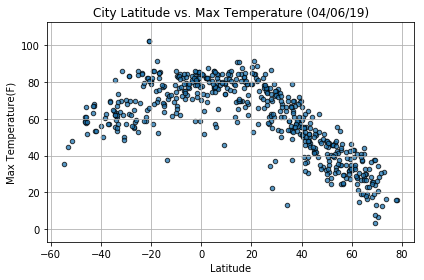

In [7]:
# Latitude vs Temperature Plot

weather_data.plot.scatter(x='Latitude', y='Max_Temp', marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Plot title, label and axis
plt.title('City Latitude vs. Max Temperature (04/06/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

# Set y limits
plt.ylim(weather_data['Max_Temp'].min() - 10, weather_data['Max_Temp'].max() + 10)

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/Lat_temp.png")
plt.grid()
plt.show()


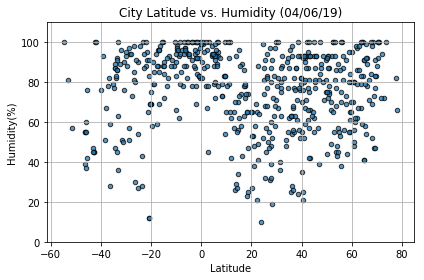

In [8]:
# Latitude vs Humidity Plot

weather_data.plot.scatter(x='Latitude', y='Humidity',marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Plot title, label and axis
plt.title('City Latitude vs. Humidity (04/06/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Set y limits
plt.ylim(weather_data['Humidity'].min() - 10, weather_data['Humidity'].max() + 10)

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/Lat_humidity.png")
plt.grid()
plt.show()


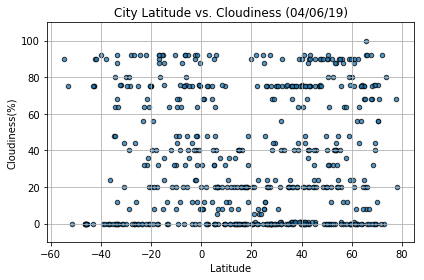

In [9]:
# Latitude vs Cloudiness Plot

weather_data.plot.scatter(x='Latitude', y='Cloudiness',marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Plot title, label and axis
plt.title('City Latitude vs. Cloudiness (04/06/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Set y limits
plt.ylim(weather_data['Cloudiness'].min() - 10, weather_data['Cloudiness'].max() + 10)

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/Lat_cloudiness.png")
plt.grid()
plt.show()


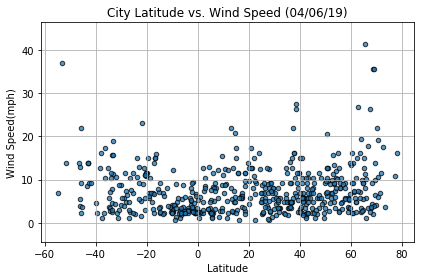

In [10]:
# Latitude vs Wind Speed Plot

weather_data.plot.scatter(x='Latitude', y='Wind_Speed',marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Plot title, label and axis
plt.title('City Latitude vs. Wind Speed (04/06/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

# Set y limits
plt.ylim(weather_data['Wind_Speed'].min() - 5 ,weather_data['Wind_Speed'].max() + 5)

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/Lat_windspeed.png")
plt.grid()
plt.show()
